In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
deaths = pd.read_csv("avg_deaths.csv") # 1st January to 15 December 2020
deaths

,Month,New_deaths
0,1,0
1,2,0
2,3,77
3,4,1844
4,5,1448
5,6,785
6,7,769
7,8,1020
8,9,739
9,10,751


In [4]:
import calendar

In [5]:
calendar.monthrange(2020,1)

(2, 31)

In [6]:
_, num_days = calendar.monthrange(2020,1)

In [7]:
num_days

31

In [8]:
deaths["num_days"] = 0

In [9]:
deaths

,Month,New_deaths,num_days
0,1,0,0
1,2,0,0
2,3,77,0
3,4,1844,0
4,5,1448,0
5,6,785,0
6,7,769,0
7,8,1020,0
8,9,739,0
9,10,751,0


In [10]:
deaths["year"] = 2020

In [11]:
deaths

,Month,New_deaths,num_days,year
0,1,0,0,2020
1,2,0,0,2020
2,3,77,0,2020
3,4,1844,0,2020
4,5,1448,0,2020
5,6,785,0,2020
6,7,769,0,2020
7,8,1020,0,2020
8,9,739,0,2020
9,10,751,0,2020


In [12]:
deaths.columns

Index(['Month', 'New_deaths', 'num_days', 'year'], dtype='object')

In [13]:
deaths = deaths[['year','Month','num_days' ,'New_deaths', ]]

deaths

,year,Month,num_days,New_deaths
0,2020,1,0,0
1,2020,2,0,0
2,2020,3,0,77
3,2020,4,0,1844
4,2020,5,0,1448
5,2020,6,0,785
6,2020,7,0,769
7,2020,8,0,1020
8,2020,9,0,739
9,2020,10,0,751


In [14]:
deaths.columns = ['Year','Month','Num_days' ,'New_deaths', ]
deaths

,Year,Month,Num_days,New_deaths
0,2020,1,0,0
1,2020,2,0,0
2,2020,3,0,77
3,2020,4,0,1844
4,2020,5,0,1448
5,2020,6,0,785
6,2020,7,0,769
7,2020,8,0,1020
8,2020,9,0,739
9,2020,10,0,751


In [15]:
def days(year,month):
    _, num_days = calendar.monthrange(year, month)
    return num_days

In [16]:
deaths.iloc[0]["Month"]

1

In [17]:
days = (deaths[["Year", "Month"]]).apply(lambda row:days(row["Year"],row["Month"]), axis = 1)

In [18]:
days

0     31
1     29
2     31
3     30
4     31
5     30
6     31
7     31
8     30
9     31
10    30
11    31
dtype: int32

In [19]:
deaths.Num_days = days

In [20]:
2//2

1

In [21]:
num = 7

num += 5

In [22]:
deaths.loc[11, "Num_days"]//=2

# deaths.loc[11, "Num_days"] = 15

In [23]:
deaths

,Year,Month,Num_days,New_deaths
0,2020,1,31,0
1,2020,2,29,0
2,2020,3,31,77
3,2020,4,30,1844
4,2020,5,31,1448
5,2020,6,30,785
6,2020,7,31,769
7,2020,8,31,1020
8,2020,9,30,739
9,2020,10,31,751


In [24]:
deaths["Monthly_deaths"] = deaths.Num_days.mul(deaths.New_deaths)

In [25]:
deaths

,Year,Month,Num_days,New_deaths,Monthly_deaths
0,2020,1,31,0,0
1,2020,2,29,0,0
2,2020,3,31,77,2387
3,2020,4,30,1844,55320
4,2020,5,31,1448,44888
5,2020,6,30,785,23550
6,2020,7,31,769,23839
7,2020,8,31,1020,31620
8,2020,9,30,739,22170
9,2020,10,31,751,23281


In [26]:
deaths.rename({"New_deaths":"Avg_deaths"}, axis = 1, inplace = True)

In [27]:
deaths

,Year,Month,Num_days,Avg_deaths,Monthly_deaths
0,2020,1,31,0,0
1,2020,2,29,0,0
2,2020,3,31,77,2387
3,2020,4,30,1844,55320
4,2020,5,31,1448,44888
5,2020,6,30,785,23550
6,2020,7,31,769,23839
7,2020,8,31,1020,31620
8,2020,9,30,739,22170
9,2020,10,31,751,23281


In [28]:
deaths["Cum_deaths"] = deaths.Monthly_deaths.cumsum()

In [29]:
deaths

,Year,Month,Num_days,Avg_deaths,Monthly_deaths,Cum_deaths
0,2020,1,31,0,0,0
1,2020,2,29,0,0,0
2,2020,3,31,77,2387,2387
3,2020,4,30,1844,55320,57707
4,2020,5,31,1448,44888,102595
5,2020,6,30,785,23550,126145
6,2020,7,31,769,23839,149984
7,2020,8,31,1020,31620,181604
8,2020,9,30,739,22170,203774
9,2020,10,31,751,23281,227055


In [30]:
# Jan - March -> 1-3
# March - Jun 3 - 6
# Jun - Oct 6 -10
# Oct - Dec 10 -12

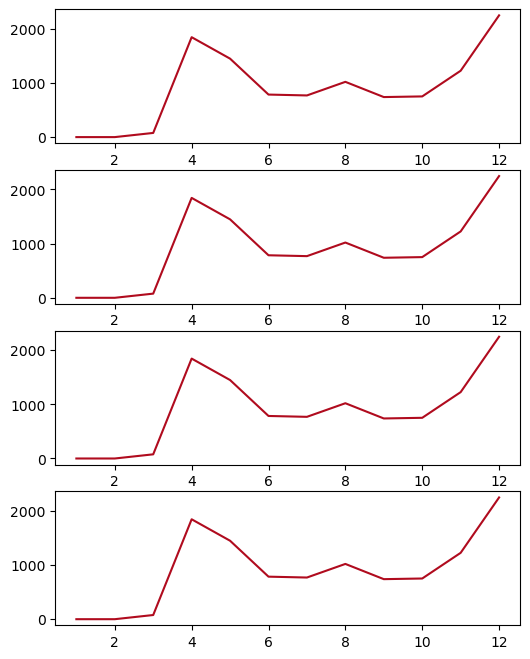

In [31]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]


for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e")
plt.show()

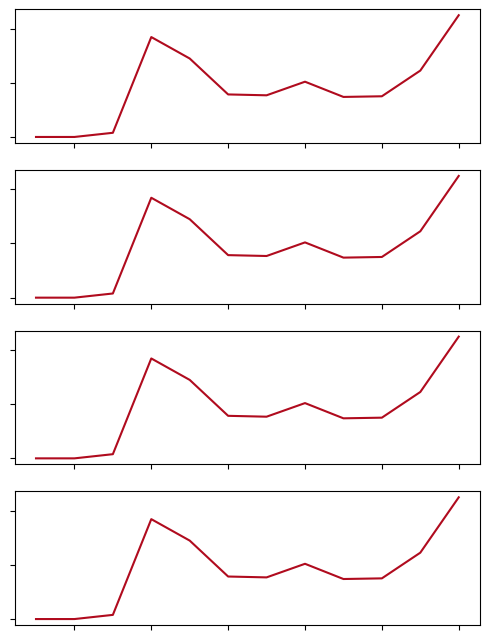

In [33]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]


for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
plt.show()

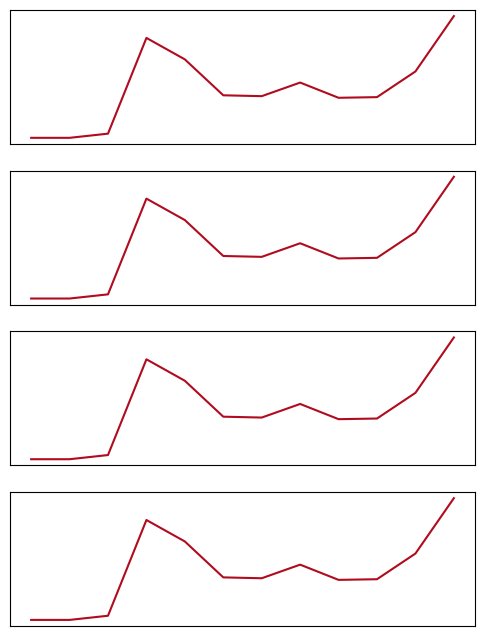

In [34]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]


for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e")
    ax.set_xticklabels([]) # Data Ink, Data Element
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False) # Non Data Ink -> removing Structural element
plt.show()

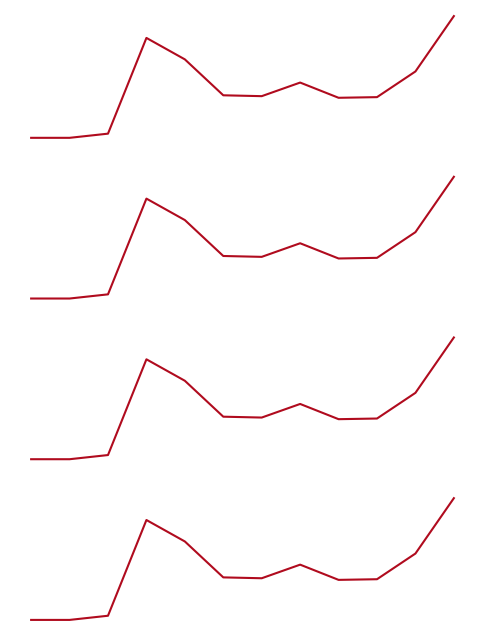

In [35]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]


for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e")
    ax.set_xticklabels([]) # Data Ink, Data Element
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False) # Non Data Ink -> removing Structural element
    # ax.spines["left"].set_visible(False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)

plt.show()

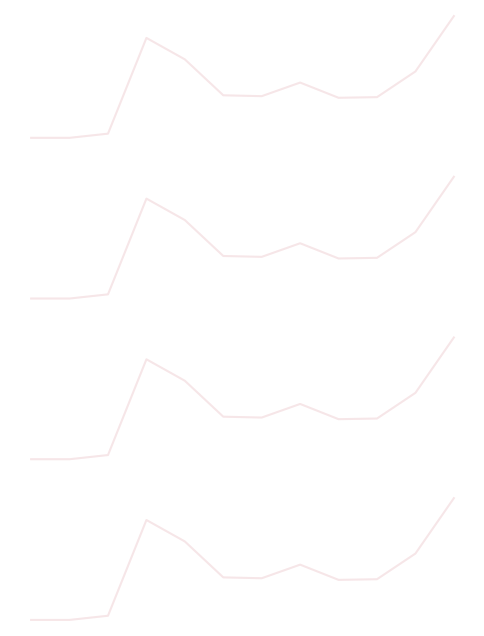

In [36]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]


for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    ax.set_xticklabels([]) # Data Ink, Data Element
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False) # Non Data Ink -> removing Structural element
    # ax.spines["left"].set_visible(False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)

plt.show()

In [37]:
deaths[:3]

,Year,Month,Num_days,Avg_deaths,Monthly_deaths,Cum_deaths
0,2020,1,31,0,0,0
1,2020,2,29,0,0,0
2,2020,3,31,77,2387,2387


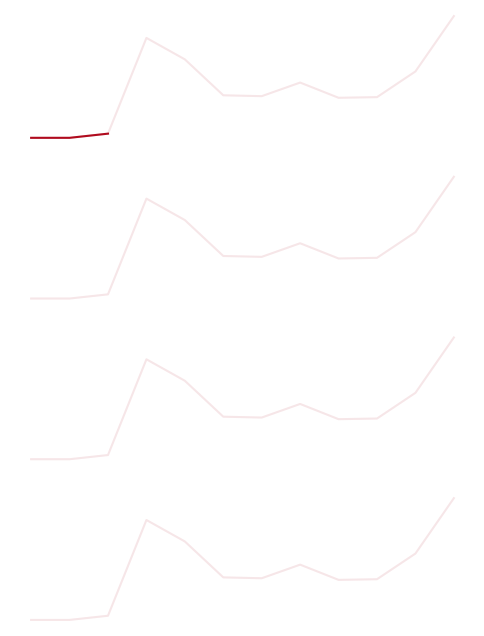

In [38]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]


for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    ax.set_xticklabels([]) # Data Ink, Data Element
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False) # Non Data Ink -> removing Structural element
    # ax.spines["left"].set_visible(False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e")
plt.show()

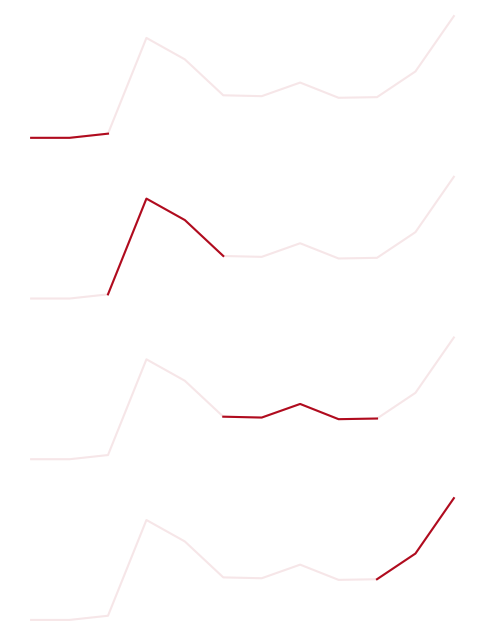

In [107]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]


for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    ax.set_xticklabels([]) # Data Ink, Data Element
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False) # Non Data Ink -> removing Structural element
    # ax.spines["left"].set_visible(False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e")
ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e")
ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e")
ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e")
plt.show()

In [39]:
deaths[5:10]

,Year,Month,Num_days,Avg_deaths,Monthly_deaths,Cum_deaths
5,2020,6,30,785,23550,126145
6,2020,7,31,769,23839,149984
7,2020,8,31,1020,31620,181604
8,2020,9,30,739,22170,203774
9,2020,10,31,751,23281,227055


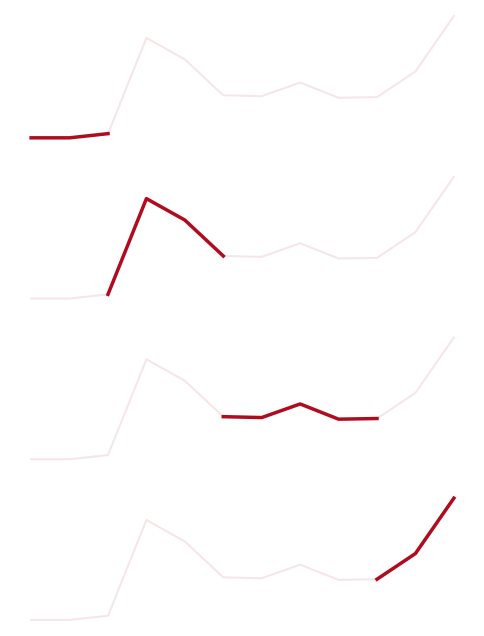

In [40]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]


for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    ax.set_xticklabels([]) # Data Ink, Data Element
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False) # Non Data Ink -> removing Structural element
    # ax.spines["left"].set_visible(False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5)
ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5)
ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)
plt.show()

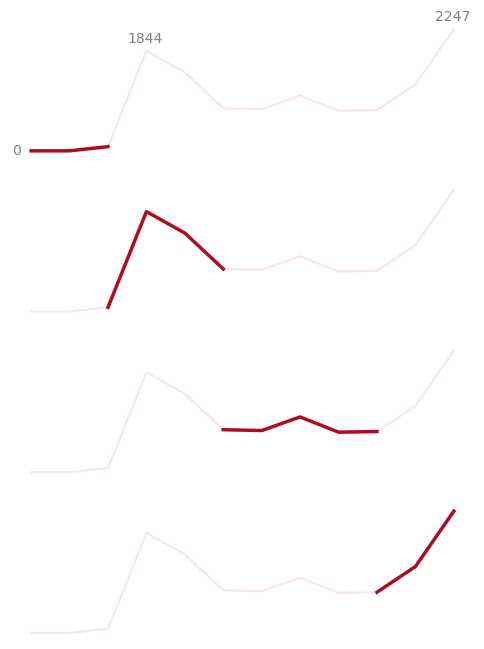

In [41]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]


for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    ax.set_xticklabels([]) # Data Ink, Data Element
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False) # Non Data Ink -> removing Structural element
    # ax.spines["left"].set_visible(False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5)
ax1.text(x = 0.5, y= -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y= 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y= 2400, s = "2247", alpha = 0.5)


ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5)
ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)



plt.show()

In [42]:
deaths

,Year,Month,Num_days,Avg_deaths,Monthly_deaths,Cum_deaths
0,2020,1,31,0,0,0
1,2020,2,29,0,0,0
2,2020,3,31,77,2387,2387
3,2020,4,30,1844,55320,57707
4,2020,5,31,1448,44888,102595
5,2020,6,30,785,23550,126145
6,2020,7,31,769,23839,149984
7,2020,8,31,1020,31620,181604
8,2020,9,30,739,22170,203774
9,2020,10,31,751,23281,227055


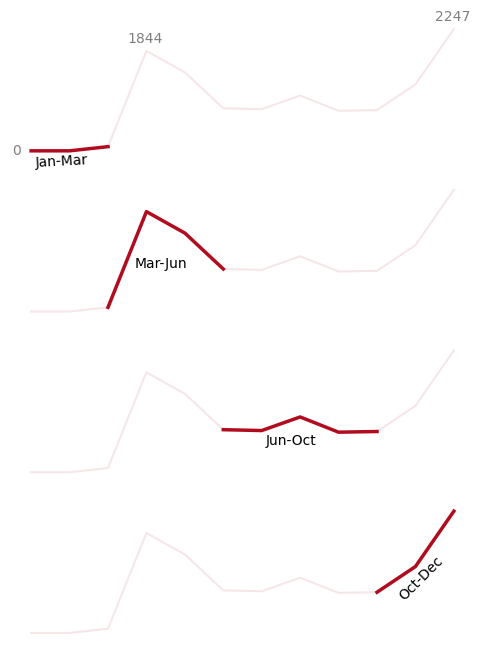

In [43]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]


for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    ax.set_xticklabels([]) # Data Ink, Data Element
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False) # Non Data Ink -> removing Structural element
    # ax.spines["left"].set_visible(False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5)
ax1.text(x = 0.5, y= -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y= 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y= 2400, s = "2247", alpha = 0.5)
ax1.text(x = 1.1, y= -300, s = "Jan-Mar", rotation = 3)


ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax2.text(x = 3.7, y= 800, s = "Mar-Jun")



ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5)
ax3.text(x = 7.1, y= 500, s = "Jun-Oct")

ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)
ax4.text(x = 10.5, y= 600, s = "Oct-Dec", rotation = 45)



plt.show()

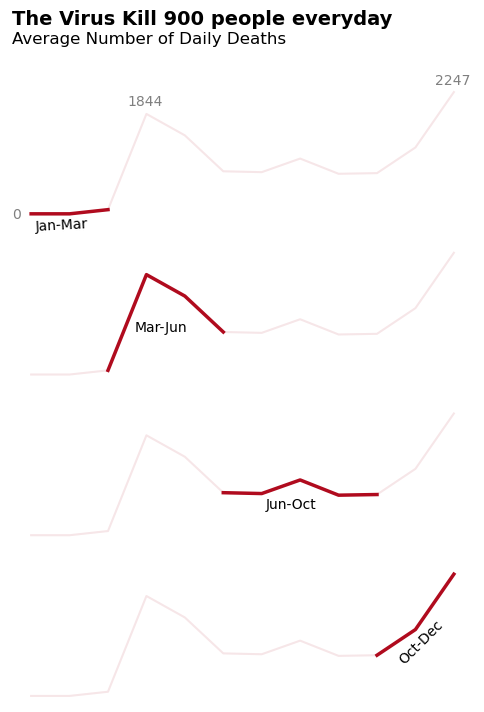

In [44]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]


for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    ax.set_xticklabels([]) # Data Ink, Data Element
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False) # Non Data Ink -> removing Structural element
    # ax.spines["left"].set_visible(False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5)
ax1.text(x = 0.5, y= -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y= 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y= 2400, s = "2247", alpha = 0.5)
ax1.text(x = 1.1, y= -300, s = "Jan-Mar", rotation = 3)
ax1.text(0.5, 3500, "The Virus Kill 900 people everyday", size = 14, weight = "bold")
ax1.text(0.5, 3150, "Average Number of Daily Deaths", size = 12,)



ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax2.text(x = 3.7, y= 800, s = "Mar-Jun")



ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5)
ax3.text(x = 7.1, y= 500, s = "Jun-Oct")

ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)
ax4.text(x = 10.5, y= 600, s = "Oct-Dec", rotation = 45)



plt.show()

In [45]:
deaths["Avg_deaths"].mean()

908.75

In [46]:
deaths

,Year,Month,Num_days,Avg_deaths,Monthly_deaths,Cum_deaths
0,2020,1,31,0,0,0
1,2020,2,29,0,0,0
2,2020,3,31,77,2387,2387
3,2020,4,30,1844,55320,57707
4,2020,5,31,1448,44888,102595
5,2020,6,30,785,23550,126145
6,2020,7,31,769,23839,149984
7,2020,8,31,1020,31620,181604
8,2020,9,30,739,22170,203774
9,2020,10,31,751,23281,227055


In [47]:
cum_cases = [deaths.loc[2,"Cum_deaths" ],deaths.loc[5,"Cum_deaths"],deaths.loc[9,"Cum_deaths" ],
            deaths.loc[11,"Cum_deaths" ]]

In [48]:
cum_cases

[2387, 126145, 227055, 297510]

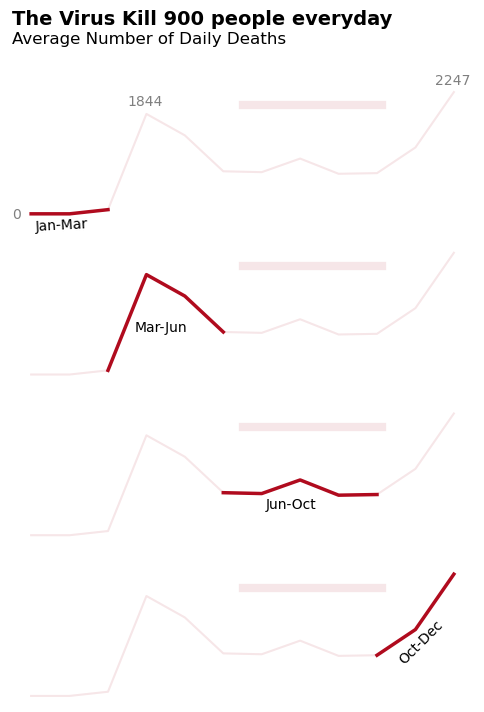

In [49]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]


for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    ax.set_xticklabels([]) # Data Ink, Data Element
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False) # Non Data Ink -> removing Structural element
    # ax.spines["left"].set_visible(False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5)
ax1.text(x = 0.5, y= -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y= 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y= 2400, s = "2247", alpha = 0.5)
ax1.text(x = 1.1, y= -300, s = "Jan-Mar", rotation = 3)
ax1.text(0.5, 3500, "The Virus Kill 900 people everyday", size = 14, weight = "bold")
ax1.text(0.5, 3150, "Average Number of Daily Deaths", size = 12,)



ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax2.text(x = 3.7, y= 800, s = "Mar-Jun")



ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5)
ax3.text(x = 7.1, y= 500, s = "Jun-Oct")

ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)
ax4.text(x = 10.5, y= 600, s = "Oct-Dec", rotation = 45)

for ax in axes:
    ax.axhline(y = 2000, xmin = 0.5, xmax = 0.8, c = "#b00b1e", linewidth = 6, alpha = 0.1)

plt.show()

In [57]:
proportions = [round(i/cum_cases[-1], 2) for i in cum_cases]
proportions

[0.01, 0.42, 0.76, 1.0]

In [58]:
proportions = []

for i in cum_cases:
    v = i/297510
    final = round(v,2)
    # print(final)
    proportions.append(final)

In [59]:
proportions

[0.01, 0.42, 0.76, 1.0]

In [60]:
xmaxs = [0.5 + i*(0.8-0.5) for i in proportions]

In [61]:
xmaxs

[0.503, 0.626, 0.728, 0.8]

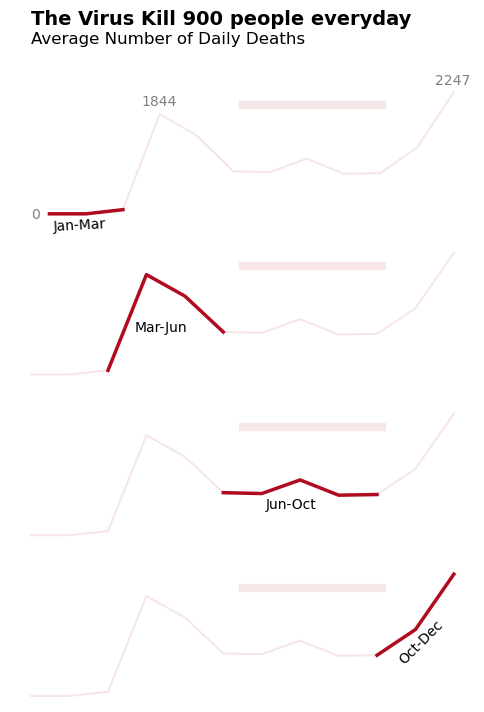

In [77]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]


for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    ax.set_xticklabels([]) # Data Ink, Data Element
    ax.set_yticklabels([])
    ax.tick_params(bottom = False, left = False) # Non Data Ink -> removing Structural element
    # ax.spines["left"].set_visible(False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5)
ax1.plot(0.503 , 1900 , color = "#b00b1e")
ax1.text(x = 0.5, y= -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y= 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y= 2400, s = "2247", alpha = 0.5)
ax1.text(x = 1.1, y= -300, s = "Jan-Mar", rotation = 3)
ax1.text(0.5, 3500, "The Virus Kill 900 people everyday", size = 14, weight = "bold")
ax1.text(0.5, 3150, "Average Number of Daily Deaths", size = 12,)


ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax2.text(x = 3.7, y= 800, s = "Mar-Jun")



ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5)
ax3.text(x = 7.1, y= 500, s = "Jun-Oct")

ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)
ax4.text(x = 10.5, y= 600, s = "Oct-Dec", rotation = 45)

for ax in axes:
    ax.axhline(y = 2000, xmin = 0.5, xmax = 0.8, c = "#b00b1e", linewidth = 6, alpha = 0.1)

plt.show()